In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline


In [7]:
data = np.loadtxt('Data - Sheet1.csv', delimiter=',', dtype=np.float64)

X, y = data[:, :-1], data[:, -1].reshape(-1, 1)

In [8]:
X

array([[ 0.100234,  0.050123],
       [-0.089765, -0.123456],
       [ 0.210987, -0.156789],
       [-0.178901,  0.234567],
       [ 0.034567, -0.098765],
       [-0.190123, -0.045678],
       [ 0.112345,  0.201234],
       [-0.056789, -0.012345],
       [ 0.245678, -0.078901],
       [-0.101234,  0.134567],
       [ 0.078901, -0.189012],
       [-0.145678, -0.06789 ],
       [ 0.189012,  0.101234],
       [-0.023456, -0.178901],
       [ 0.201234, -0.034567],
       [-0.16789 ,  0.089012],
       [ 0.06789 , -0.134567],
       [-0.123456, -0.201234],
       [ 0.156789,  0.023456],
       [-0.078901, -0.101234],
       [ 0.234567, -0.112345],
       [-0.034567,  0.156789],
       [ 0.089012, -0.056789],
       [-0.201234, -0.145678],
       [ 0.134567,  0.178901],
       [-0.189012, -0.089012],
       [ 0.045678, -0.210987],
       [-0.012345, -0.078901],
       [ 0.178901,  0.245678],
       [-0.090123, -0.023456],
       [ 0.223456, -0.101234],
       [-0.112345,  0.190123],
       [

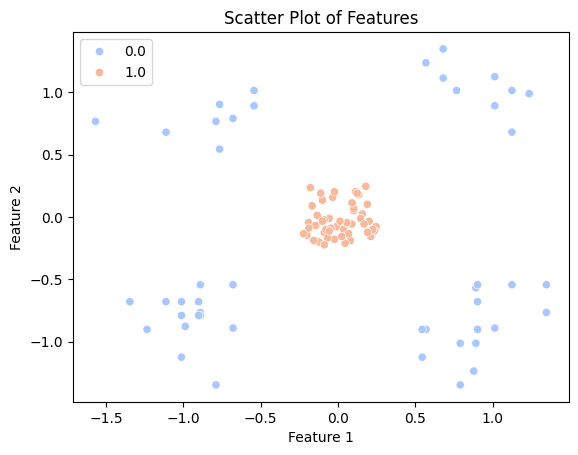

In [9]:
sns.scatterplot(x = X[:,0], y =X[:,1], hue = y.flatten(), palette = 'coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features')
plt.show()

## The Sigmoid Functiuon ##

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## The Cross Entropy Loss Function ##

In [ ]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cos = -(np.sum(y*np.log(h) + np.sum((1-y)*np.log(1-h))) / len(y))
    return cos

## The Gradient ##

In [ ]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (h - y)) / len(y)
    return grad

## The Feature Trick ##

In [ ]:
def expand_feature(x1,x2,power = 2):
    #expend a 20 feature to polynimial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.hstack(new_x, (x1 ** (i - j) * x2 ** j).reshape(-1, 1), axis=1)
    return new_x

In [ ]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) >= 0.5).flatten()

## Gradient Descent ##

In [ ]:
def gradient_descent(X,y,theta, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * (np.dot(X.T, (h - y)) / m)
        costs.append(loss(theta, X, y))
    return theta, costs 